In [221]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from keras.models import Sequential
from keras.layers import Dense, ReLU
import tensorflow as tf                # To remove logging
from statistics import mode
import matplotlib.pyplot as plt
#tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.mode.chained_assignment = None
np.random.seed(100)

import warnings
warnings.filterwarnings("ignore")


In [222]:
myData = pd.read_csv("../input/heart-ds/heart.csv")
myData.head()

,ag,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [223]:
myData.columns

Index(['ag', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [224]:
myData.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']
myData.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia', 'target'],
      dtype='object')

In [225]:
myData.replace({"sex": {0:"female", 1:"male"}}, inplace = True)
myData.replace({"chest_pain_type": {1:"typical angina", 2:"atypical angina", 3:"non-anginal pain", 4:"asymptomatic"}}, inplace = True)
myData.replace({"fasting_blood_sugar": {0:"lower than 120mg/ml", 1:"greater than 120mg/ml"}}, inplace = True)

myData.replace({"rest_ecg": {0:"normal", 1:"ST-T wave abnormality", 2:"left ventricular hypertrophy"}}, inplace = True)
myData.replace({"exercise_induced_angina": {0:"no", 1:"yes"}}, inplace = True)
myData.replace({"st_slope": {1:"upsloping", 2:"flat", 3:"downsloping"}}, inplace = True)
myData.replace({"thalassemia": {1:"normal", 2:"fixed defect", 3:"reversible defect"}}, inplace = True)

# myData['sex'][myData['sex'] == 0] = 'female'
# myData['sex'][myData['sex'] == 1] = 'male'
# myData['chest_pain_type'][myData['chest_pain_type'] == 1] = 'typical angina'
# myData['chest_pain_type'][myData['chest_pain_type'] == 2] = 'atypical angina'
# myData['chest_pain_type'][myData['chest_pain_type'] == 3] = 'non-anginal pain'
# myData['chest_pain_type'][myData['chest_pain_type'] == 4] = 'asymptomatic'
# myData['fasting_blood_sugar'][myData['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
# myData['fasting_blood_sugar'][myData['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

# myData['rest_ecg'][myData['rest_ecg'] == 0] = 'normal'
# myData['rest_ecg'][myData['rest_ecg'] == 1] = 'ST-T wave abnormality'
# myData['rest_ecg'][myData['rest_ecg'] == 2] = 'left ventricular hypertrophy'

# myData['exercise_induced_angina'][myData['exercise_induced_angina'] == 0] = 'no'
# myData['exercise_induced_angina'][myData['exercise_induced_angina'] == 1] = 'yes'

# myData['st_slope'][myData['st_slope'] == 1] = 'upsloping'
# myData['st_slope'][myData['st_slope'] == 2] = 'flat'
# myData['st_slope'][myData['st_slope'] == 3] = 'downsloping'


# myData['thalassemia'][myData['thalassemia'] == 1] = 'normal'
# myData['thalassemia'][myData['thalassemia'] == 2] = 'fixed defect'
# myData['thalassemia'][myData['thalassemia'] == 3] = 'reversible defect'

In [226]:
myData = pd.get_dummies(myData, drop_first=True)
# Categories have been spread out in a 'one-hot' encoding
# Age, blood pressure, cholesterol, etc are still numbers, not one-hot

In [227]:
# We're going to want to normalize these categories to either [0,1] or [-1,1]
myData = (myData - np.min(myData)) / (np.max(myData) - np.min(myData))

In [228]:
x_train, x_test, y_train, y_test = train_test_split(myData.drop('target', axis=1),
                                                    myData['target'], test_size=.2, random_state=0)




# **ML**

In [229]:
RESULTS_ACCURACY = {}

In [230]:
lin_model = LogisticRegression(solver='lbfgs')
lin_model.fit(x_train, y_train)
RESULTS_ACCURACY['lin_model'] = round(lin_model.score(x_test, y_test)*100, 4)


knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)
RESULTS_ACCURACY['knn_model'] = round(knn_model.score(x_test, y_test)*100, 4)


svm_model = SVC(gamma='auto')
svm_model.fit(x_train, y_train)
RESULTS_ACCURACY['svm_model'] = round(svm_model.score(x_test, y_test)*100, 4)

nb_model = GaussianNB()
nb_model.fit(x_train, y_train)
RESULTS_ACCURACY['nb_model'] = round(nb_model.score(x_test, y_test)*100, 4)


tree_model = DecisionTreeClassifier()
tree_model.fit(x_train, y_train)
RESULTS_ACCURACY['tree_model'] = round(tree_model.score(x_test, y_test)*100, 4)


forest_model = RandomForestClassifier(n_estimators=100)
forest_model.fit(x_train, y_train)
RESULTS_ACCURACY['forest_model'] = round(forest_model.score(x_test, y_test)*100, 4)


In [231]:
def categoriesStats(X, Y, xlbl = "", ylbl = "", title = ""):
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_axes([0,0,1,1])
    New_Colors = ['green','blue','purple','brown','teal','red','black']
    ax.bar(X, Y, color=New_Colors)
    #plt.xlabel(xlbl, fontsize=20)
    plt.ylabel(ylbl, fontsize=20)
    plt.title(title)
    plt.xticks(rotation=45)
    # plt.grid(True)

    rects = ax.patches

    # Make some labels.
    labels = [f"{Y[i]}" for i in range(len(rects))]

    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
        )
        plt.ylim([0, max(Y)+10])

    #return fig
def plotAccAndLoss(history, size = (12,5)):
    
    if 'accuracy' in history.history or 'val_accuracy' in history.history:
        fig = plt.subplots(1, 1, figsize = size, sharey=True)
        if 'accuracy' in history.history:
            plt.plot(history.history['accuracy'], label = "accuracy", color = 'g')
        if 'val_accuracy' in history.history:
            plt.plot(history.history['val_accuracy'], label ="val_accuracy")
        plt.title('model accuracy')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.ylim((0, 1))
        if 'accuracy' in history.history and 'val_accuracy' in history.history:
            plt.legend(loc='upper left');
        plt.savefig("acc.png")
    
    if 'loss' in history.history or 'val_loss' in history.history:
        fig = plt.subplots(1, 1, figsize = size, sharey=True)

        if 'loss' in history.history:
            plt.plot(history.history['loss'], label = "loss", color = 'r')
        if 'val_loss' in history.history:
            plt.plot(history.history['val_loss'], label ="val_loss",color = 'b')
        plt.title('model loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
#         plt.ylim((0, 1))
        if 'loss' in history.history and 'val_loss' in history.history:
            plt.legend(loc='upper left');
        plt.savefig("loss.png")
    
def Plot_cm(y_predictions, y_test, class_names):
    conf_mat = confusion_matrix(y_test, y_predicted)

    fig,ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks,class_names)
    plt.yticks(tick_marks,class_names)
    
    sns.heatmap(pd.DataFrame(conf_mat),annot=True,cmap="Blues",fmt="d",cbar=False)
    ax.xaxis.set_label_position('top')
#     plt.tight_layout()
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label');
    plt.savefig("cm.png")


def calcSenseSpecAcc(y_predictions, y_test):
    bin_predictions = y_predictions.flatten()
    report= classification_report(y_test, bin_predictions)
    return report

    conf_mat = confusion_matrix(y_test, y_predicted)
    total = sum(sum(conf_mat))
    sensitivity = conf_mat[0, 0]/(conf_mat[0, 0] + conf_mat[1, 0])
    specificity = conf_mat[1, 1]/(conf_mat[1, 1] + conf_mat[0, 1])
    accuracy = (conf_mat[0, 0] + conf_mat[1, 1])/total
    return {"sensitivity":sensitivity,
           "specificity":specificity,
           "accuracy":accuracy
           }

def compareTwoList(a, b):
    matches = [idx for idx, item in enumerate(zip(a, b)) if item[0] == item[1]]
    matchesNum = len(matches)
    return matches, matchesNum

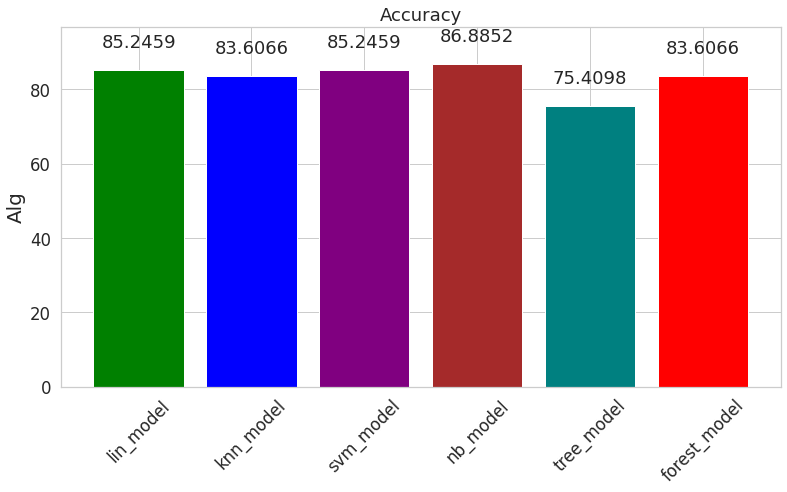

In [232]:
    
categoriesStats(list(RESULTS_ACCURACY.keys()), list(RESULTS_ACCURACY.values()), xlbl = "Acc", ylbl = "Alg", title = "Accuracy")

# **DL**

In [233]:
nn_model = Sequential()
nn_model.add(Dense(100, input_shape=(19,)))
nn_model.add(ReLU())
nn_model.add(Dense(100))
nn_model.add(ReLU())
nn_model.add(Dense(10))
nn_model.add(ReLU())
nn_model.add(Dense(1, activation='sigmoid'))

In [234]:
nn_model.compile(optimizer='Adam', loss='categorical_hinge', metrics=['accuracy'])
history = nn_model.fit(x_train, y_train, epochs=50, verbose=0)

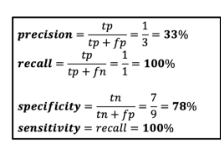
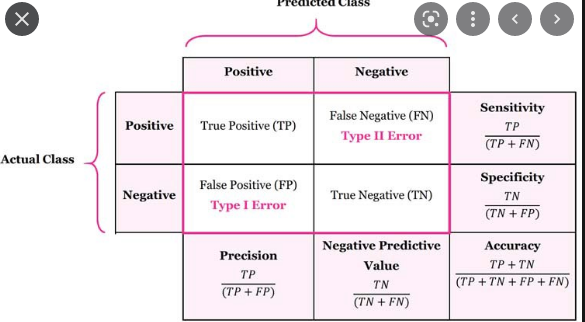

              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85        27
         1.0       0.88      0.88      0.88        34

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



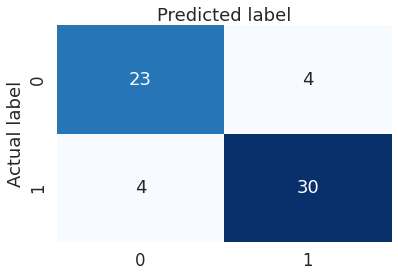

In [235]:
y_predicted = (nn_model.predict(x_test) > 0.5)
print(calcSenseSpecAcc(y_predicted, y_test))
Plot_cm(y_predicted, y_test, [0,1])

# **Voting**

In [236]:
votes = lin_model.predict(x_test) +\
        svm_model.predict(x_test) + \
        nb_model.predict(x_test) +\
        forest_model.predict(x_test) +\
        tree_model.predict(x_test) +\
        knn_model.predict(x_test) +\
        ((nn_model.predict(x_test)>0.5).T)[0].astype(float)


# compareTwoList(y_predicted, b)[1], "out of ", len(a)

Statistics for voting classifier, where it only takes 4 positive votes (out of 7 votes) to declare a positive result:

              precision    recall  f1-score   support

       False       0.82      0.85      0.84        27
        True       0.88      0.85      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



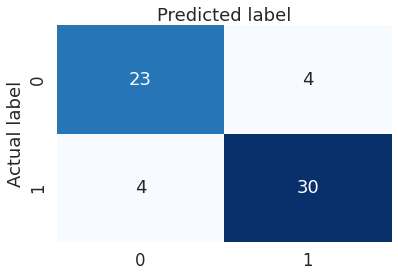

In [237]:
y_predicted1 = votes >= 4
y_test1 = y_test.values == 1.0
print("Statistics for voting classifier, where it only takes 4 positive votes (out of 7 votes) to declare "
      "a positive result:\n")
print(calcSenseSpecAcc(y_predicted1, y_test1))
Plot_cm(y_predicted1, y_test1, [0,1])

Statistics for voting classifier, where it only takes 2 positive votes (out of 7 votes) to declare a positive result:

              precision    recall  f1-score   support

       False       0.91      0.78      0.84        27
        True       0.84      0.94      0.89        34

    accuracy                           0.87        61
   macro avg       0.88      0.86      0.86        61
weighted avg       0.87      0.87      0.87        61



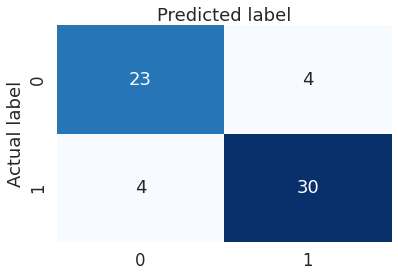

In [238]:
y_predicted1 = votes >= 2
y_test1 = y_test.values == 1.0
print("Statistics for voting classifier, where it only takes 2 positive votes (out of 7 votes) to declare "
      "a positive result:\n")
print(calcSenseSpecAcc(y_predicted1, y_test1))
Plot_cm(y_predicted1, y_test1, [0,1])

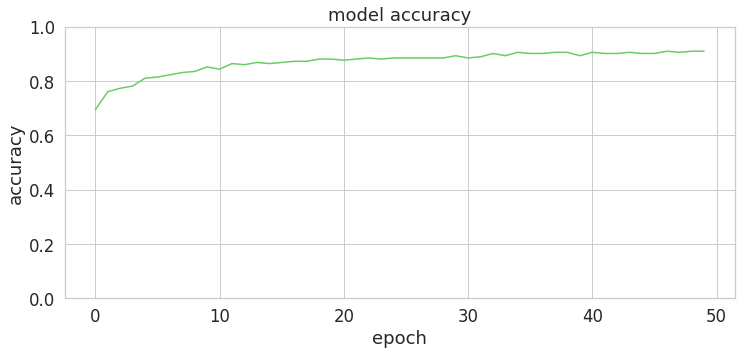

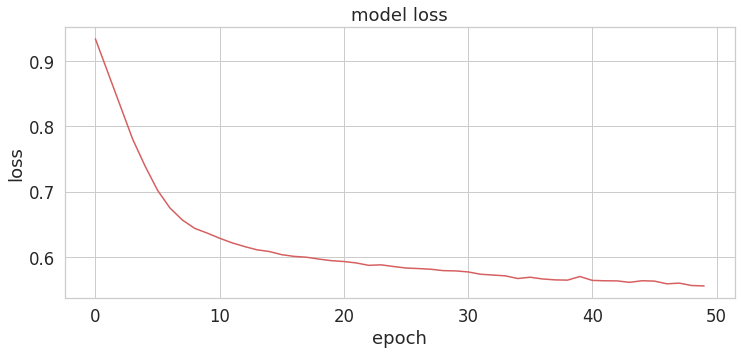

In [239]:
plotAccAndLoss(history, (12,5))